## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:

"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ['val_acc','val_loss']
PATIENCE = [10,25]

In [7]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for monitor in MONITOR:
    for patience in PATIENCE:
        earlystop = EarlyStopping(monitor=monitor, 
                          patience=patience, 
                          verbose=1
                          )
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        exp_name_tag = "monitor : %s , patience : %s" %(monitor,patience)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

C:\Users\b1212\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,loss,accuracy,val_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 6s 124us/step - loss: 1.7544 - accuracy: 0.3918 - val_loss: 2.0012 - val_accuracy: 0.2734
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6249 - accuracy: 0.4342 - val_loss: 1.8605 - val_accuracy: 0.3393
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5520 - accuracy: 0.4587 - val_loss: 1.7488 - val_accuracy: 0.3876
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4977 - accuracy: 0.4768 - val_loss: 1.6641 - val_accuracy: 0.4128
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4505 - accuracy: 0.4937 - val_loss: 1.6083 - val_accuracy: 0.4333
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.4127 - accuracy: 0.5074 - val_loss: 1.5714 - val_accuracy: 0.4439
Epoch 8/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.3751 - accuracy: 0.5223 - val_loss: 1.5

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2049 - accuracy: 0.2752 - val_loss: 2.1478 - val_accuracy: 0.1911
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7370 - accuracy: 0.3964 - val_loss: 1.9845 - val_accuracy: 0.2842
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6107 - accuracy: 0.4381 - val_loss: 1.8499 - val_accuracy: 0.3510
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5331 - accuracy: 0.4639 - val_loss: 1.7168 - val_accuracy: 0.4049
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4751 - accuracy: 0.4854 - val_loss: 1.6587 - val_accuracy: 0.4139
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4280 - accuracy: 0.5030 - val_loss: 1.5953 - val_accuracy: 0.4341
Epoch 7/50
50000/50000 [==============================] - 7s 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1721 - accuracy: 0.2726 - val_loss: 2.1479 - val_accuracy: 0.2035
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7516 - accuracy: 0.3906 - val_loss: 1.9699 - val_accuracy: 0.2951
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6312 - accuracy: 0.4293 - val_loss: 1.8219 - val_accuracy: 0.3662
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5576 - accuracy: 0.4569 - val_loss: 1.7291 - val_accuracy: 0.3957
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5014 - accuracy: 0.4764 - val_loss: 1.6658 - val_accuracy: 0.4201
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4565 - accuracy: 0.4927 - val_loss: 1.5883 - val_accuracy: 0.4474
Epoch 7/50
50000/50000 [==============================] - 6s 1

Epoch 17/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1283 - accuracy: 0.6136 - val_loss: 1.4692 - val_accuracy: 0.4890
Epoch 18/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.1064 - accuracy: 0.6203 - val_loss: 1.4621 - val_accuracy: 0.4918
Epoch 19/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.0834 - accuracy: 0.6293 - val_loss: 1.4717 - val_accuracy: 0.4945
Epoch 20/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.0606 - accuracy: 0.6357 - val_loss: 1.4645 - val_accuracy: 0.4959
Epoch 21/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.0394 - accuracy: 0.6449 - val_loss: 1.4661 - val_accuracy: 0.4946
Epoch 22/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.0185 - accuracy: 0.6530 - val_loss: 1.4700 - val_accuracy: 0.4907
Epoch 23/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.9967 - accuracy: 0.6629

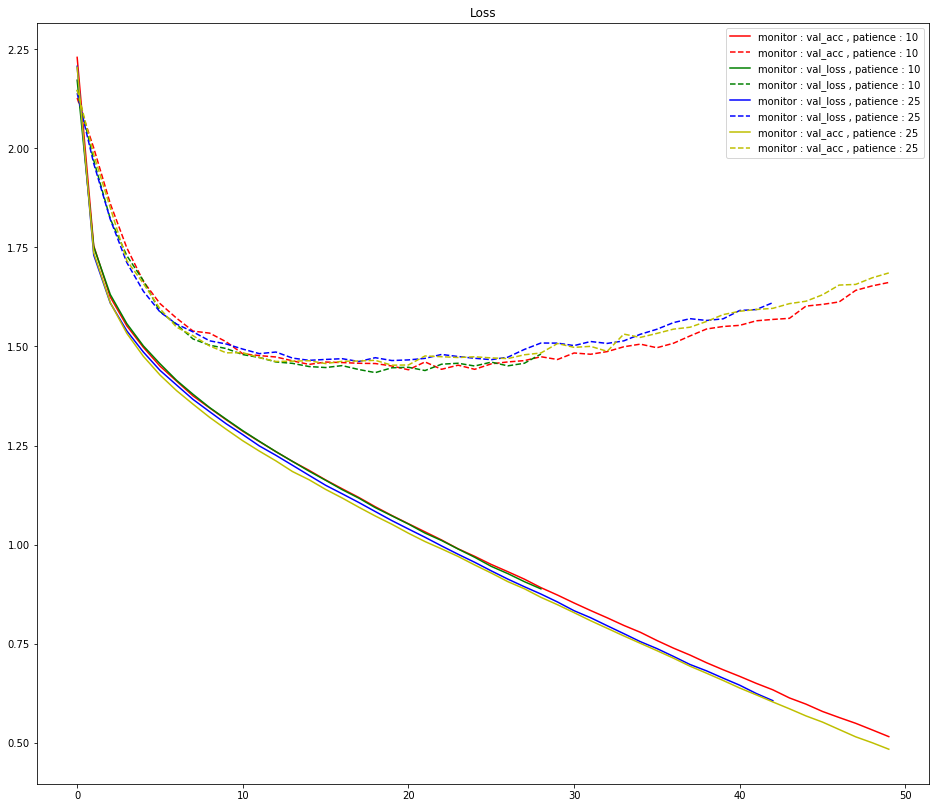

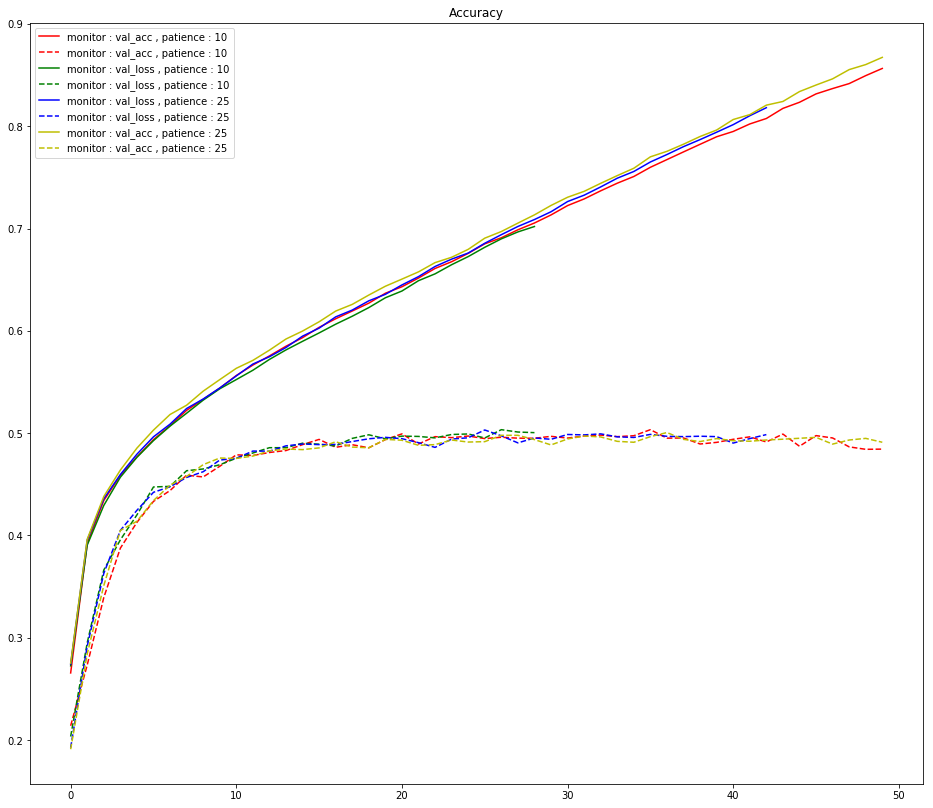

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()